In [1]:
!pip install nltk scikit-learn wordcloud matplotlib seaborn


In [3]:
from google.colab import files
import pickle

# Upload
uploaded = files.upload()  # Opens file upload dialog

# Get filename
filename = list(uploaded.keys())[0]

# Step 2. Load the pickle file
with open(filename, 'rb') as f:
    newsgroup_data = pickle.load(f)

# Step 3. Check data loaded
print(type(newsgroup_data))
print(newsgroup_data[:2])  # Preview first 2 entries


Saving newsgroups to newsgroups
<class 'list'>
["The best group to keep you informed is the Crohn's and Colitis Foundation\nof America.  I do not know if the UK has a similar organization.  The\naddress of\nthe CCFA is \n\nCCFA\n444 Park Avenue South\n11th Floor\nNew York, NY  10016-7374\nUSA\n\nThey have a lot of information available and have a number of newsletters.\n \nGood Luck.", '%>I dunno, Lemieux?  Hmmm...sounds like he\n%>has *French* blood in him!!!  Hey!  France is part of Europe!  Send that\n%>Euro-blooded boy back!!!\n%\n% Don\'t you Americans study history...the French settled in North America\n% as early or before the British...Lemieux can probably trace back his\n% North American heritage back a lot further than most of us.\n\n\n<friendly-jibe mode on>\n\nDon\'t you Canadians understand sarcasm?  Sometimes the reader must\ndecide that what he\'s reading is so ludicrous that it must mean\nthe opposite of what it said...\n\nKinda like the "Toronto\'s going to win the Cup

In [4]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
cleaned_data = [clean_text(doc) for doc in newsgroup_data]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize data with CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(cleaned_data)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_data)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

# Show 10 words per topic
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


Topic 1:
['like', 'dont', 'good', 'know', 'time', 'new', 'car', 'im', 'think', 'cancer']
Topic 2:
['year', 'game', 'team', 'play', 'games', 'good', 'season', 'second', 'win', 'period']
Topic 3:
['550', 'space', 'nasa', 'data', 'information', 'available', 'list', 'ftp', 'email', 'lunar']
Topic 4:
['like', 'time', 'dont', 'think', 'know', 'new', 'test', 'data', 'good', 'theory']
Topic 5:
['ground', 'gm', 'game', 'games', 'hockey', 'good', 'pick', 'grounding', 'like', 'conductor']
Topic 6:
['god', 'people', 'argument', 'think', 'say', 'dont', 'believe', 'know', 'bible', 'religion']
Topic 7:
['know', 'dont', 'use', 'im', 'chip', 'work', 'like', 'need', 'way', 'new']
Topic 8:
['25', 'car', 'dont', 'think', 'cars', 'like', 'im', 'good', 'people', 'oil']
Topic 9:
['vs', 'dont', 'think', 'la', 'like', 'detroit', 'really', 'cal', 'toronto', 'bike']
Topic 10:
['drive', 'disk', 'drives', 'card', 'hard', 'use', 'controller', 'scsi', 'bios', 'data']


Topic Modeling with **NMF**

In [6]:
from sklearn.decomposition import NMF

# Vectorize data with TF-IDF for NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(cleaned_data)

# Fit NMF model
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_data)

# Show top words per topic
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), 10)


Topic 1:
['dont', 'think', 'people', 'time', 'im', 'like', 'good', 'know', 'way', 'ive']
Topic 2:
['drive', 'disk', 'drives', 'scsi', 'hard', 'cable', 'floppy', 'problem', 'power', 'mac']
Topic 3:
['n3jxp', 'skepticism', 'gebcadredslpittedu', 'shameful', 'intellect', 'chastity', 'surrender', 'banks', 'gordon', 'soon']
Topic 4:
['game', 'team', 'year', 'games', 'players', 'hockey', 'season', 'win', 'play', 'teams']
Topic 5:
['thanks', 'know', 'email', 'advance', 'im', 'info', 'looking', 'information', 'like', 'hi']
Topic 6:
['car', 'cars', 'driving', 'miles', 'dealer', 'like', 'engine', 'auto', 'volvo', 'owner']
Topic 7:
['card', 'controller', 'bus', 'port', 'ide', 'pc', 'serial', 'dma', 'vga', 'irq']
Topic 8:
['space', 'nasa', 'data', 'program', 'launch', 'information', 'available', 'science', 'use', 'shuttle']
Topic 9:
['god', 'freewill', 'satan', 'tells', 'angels', 'atheism', 'say', 'belief', 'believe', 'bible']
Topic 10:
['simms', 'monitor', 'apple', 'vram', 'use', 'chip', 'mac', 'v

Plotting WordClouds for **Topics**

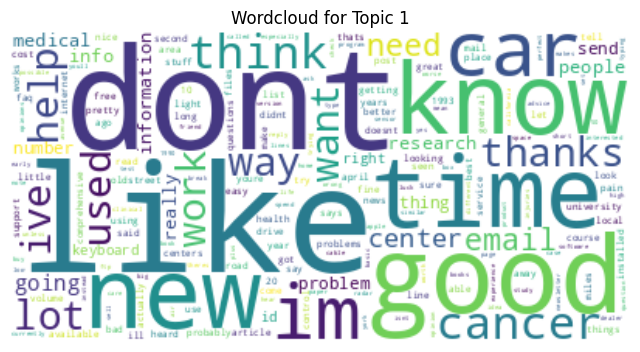

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot wordclouds
def plot_wordcloud(model, feature_names, topic_index):
    topic = model.components_[topic_index]
    freq = {feature_names[i]: topic[i] for i in topic.argsort()}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud for Topic {topic_index+1}")
    plt.show()

# Example: plot wordcloud for first LDA topic
plot_wordcloud(lda, count_vectorizer.get_feature_names_out(), 0)

# You can loop to plot all 10 topics


Commit to Git **repository**

# Topic Modeling Practice

## Objective
Identify topics in the 20 Newsgroups dataset using LDA and NMF.

## Pipeline
- Data loading
- Text cleaning (lowercase, remove punctuation and stopwords)
- LDA and NMF topic modeling
- Visualization with wordclouds

## Results
See notebook for top 10 words per topic and topic wordclouds.

---



nltk
scikit-learn
wordcloud
matplotlib
seaborn


In [12]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [13]:
!git config --global user.email "bayrembamor2@gmail.com"
!git config --global user.name "BayremEsprit"

In [14]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [15]:
!git remote add origin https://github.com/BayremEsprit/anyway.git

In [16]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	newsgroups
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [17]:
!git add .
!git commit -m "First commit from Colab"
!git push -u origin main

[master (root-commit) 8793025] First commit from Colab
 22 files changed, 51025 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.06.26/13.34.15.560747.log
 create mode 100644 .config/logs/2025.06.26/13.34.38.135551.log
 create mode 100644 .config/logs/2025.06.26/13.34.47.037102.log
 create mode 100644 .config/logs/2025.06.26/13.34.48.667465.log
 create mode 100644 .config/logs/2025.06.26/13.34.57.539869.log
 create mode 100644 .config/logs/2025.06.26/13.34.58.222152.log
 create mode 100644 newsgroups
 create mode 100755